<a href="https://colab.research.google.com/github/yalawi1/dataForMachineLearning/blob/main/ML_YousefAlawi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Model in Python
**by Yousef Alawi**


---


## Objective :
- In the modeling stage of the machine learning process, our goal is to choose and apply the appropriate machine learning approach that works with the data we have and solves the problem that we intend to solve. One of the most common models used in solving regression problems is Linear Regression.



- In this exercise, we'll use a historical data set, to build a linear regression model that predicts the number of bike rentals


## Machine Learning Process :
1.   Data Collection
2.   Data Exploration
3.   Data Preperation
4.   Modeling 
5.   Evaluation



## **1. Data Collection**
**Things to consider when collecting data**


*   Accurate
*   Relavent
*   Quantity
*   Variabilty
*   Ethics


In [ ]:
import pandas as pd
import pandas as pd
url = "https://raw.githubusercontent.com/yalawi1/dataForMachineLearning/main/bikes.csv"
bikes = pd.read_csv(url)
bikes.head()


,temperature,humidity,windspeed,rentals
0,46.716528,0.815969,13.669663,985
1,48.350239,0.800497,15.199782,801
2,34.212394,0.592097,13.247558,1349
3,34.520000,0.623196,11.687963,1562
4,36.800562,0.624643,13.148281,1600


## **2. Data Exploration**

Data exploration is a process of describing, visualizing, and analyzing data in order to better understand it. Data exploration enables us to answer questions such as how many rows and columns are in the data. What type of data do we have? Are there missing, inconsistent, or duplicate values in the data?


In [ ]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  731 non-null    float64
 1   humidity     731 non-null    float64
 2   windspeed    731 non-null    float64
 3   rentals      731 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 23.0 KB


In [ ]:
bikes.describe()

,temperature,humidity,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000
mean,59.509553,0.486937,9.238886,4504.348837
std,15.486114,0.185415,3.379815,1937.211452
min,22.602432,0.000000,0.932208,22.000000
25%,46.117264,0.353548,6.863568,3152.000000
50%,59.758972,0.502227,9.503508,4548.000000
75%,73.048236,0.624671,11.814559,5956.000000
max,90.497028,0.972500,21.126627,8714.000000


<Axes: xlabel='temperature', ylabel='rentals'>

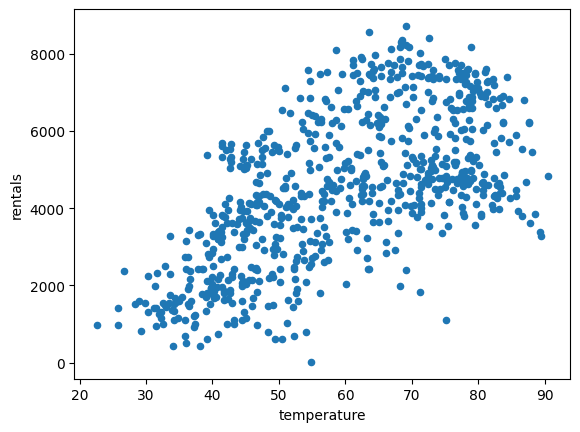

In [ ]:
%matplotlib inline
bikes.plot(kind = 'scatter', x = 'temperature', y = 'rentals')

 The chart shows that there is a positive linear relationship between temperature and rentals. This means that as the temperature increases, so does the number of bike rentals.

<Axes: xlabel='humidity', ylabel='rentals'>

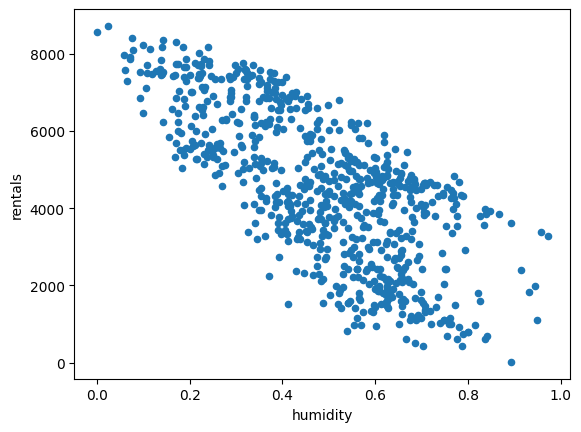

In [ ]:
bikes.plot(kind = 'scatter', x = 'humidity', y = 'rentals')

This chart shows that there is a negative, linear relationship between humidity and rentals. This means that as humidity increases, the number of bike rentals decreases

<Axes: xlabel='windspeed', ylabel='rentals'>

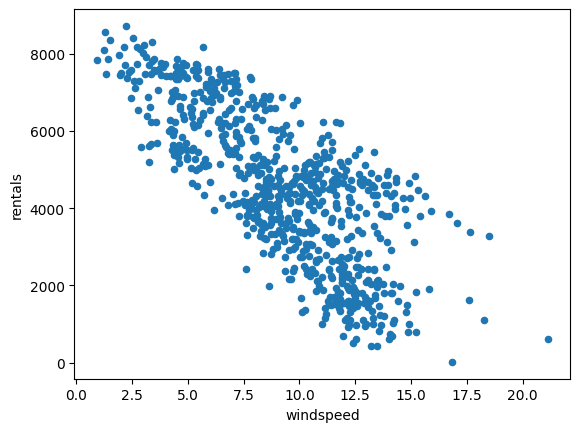

In [ ]:
bikes.plot(kind = 'scatter', x = 'windspeed', y = 'rentals')

The chart also shows a negative linear relationship between wind speed and rentals. This means that the number of bike rentals decreases, as wind speed picks up.

## **3. Data Prepertion**

Data preparation is a process of making sure that our data is suitable for the machine learning approach that we choose to use.

In [ ]:
response = 'rentals'
y = bikes[[response]]
y

,rentals
0,985
1,801
2,1349
3,1562
4,1600
...,...
726,2114
727,3095
728,1341
729,1796


In [ ]:
predictors = list(bikes.columns)
predictors.remove(response)
x = bikes[predictors]
x

,temperature,humidity,windspeed
0,46.716528,0.815969,13.669663
1,48.350239,0.800497,15.199782
2,34.212394,0.592097,13.247558
3,34.520000,0.623196,11.687963
4,36.800562,0.624643,13.148281
...,...,...,...
726,39.102528,0.482493,10.801229
727,39.031972,0.480433,8.996301
728,39.031972,0.717730,11.829425
729,39.243472,0.523039,12.805314


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1234) 

## **4. Modeling**
The objective of linear regression is to estimate, the intercept and slope values for a regression line, that best fits the data.

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)

In [ ]:
model.intercept_

array([3800.68469948])

In [ ]:
model.coef_

array([[   80.35314543, -4665.73867387,  -196.21650368]])

The model coefficients correspond to the order in which the independent variables are listed in the training data. This means that the equation for the fitted regression line can be written as:

𝑦 = 3800.68 + 80.35×𝑡𝑒𝑚𝑝𝑒𝑟𝑎𝑡𝑢𝑟𝑒 −4665.74×ℎ𝑢𝑚𝑖𝑑𝑖𝑡𝑦 −196.22×𝑤𝑖𝑛𝑑𝑠𝑝𝑒𝑒𝑑
 
With the linear regression equation, we can estimate what our model will predict given any weather condition. For example, given a temperature of  72∘𝐹
 ,  22%
  humidity and windspeed of  5
  miles per hour, our model would predict:

7,578 bikes ≈ 3800.68 +80.35×72 −4665.74×.22 −196.22×5

## **5. Evaluation**



In [ ]:
model.score(x_test, y_test)

0.9820623857913312

The R squared value tells us that our model is able to explain 98.2% of the variability in the response values, of the test data. 

**That is very good.**

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

194.31620720519655

The mean absolute error, between the actual response values, and the predicted response values.



---



# Machine Learning with Python Course

This repository contains my completed work for the "Machine Learning with Python" course taught by Frederick Nwanganga. This course provides an introduction to machine learning and step-by-step guidance on how to get started with machine learning using Python.

## Course Overview

The course covers the following topics:

- What it means for machines to learn and the different ways they learn.
- How to collect, understand, and prepare data for machine learning.
- Guided examples of how to accomplish each step using Python.
- Building, evaluating, and interpreting the results of a machine learning model in Python.


## Course Completion

By completing this course, I have gained an understanding of the basics of machine learning and how to apply it using Python. Specifically, I have learned:

- What machine learning is and how it works.
- The different types of machine learning algorithms and when to use them.
- How to prepare data for machine learning using Python libraries such as pandas and numpy.
- How to build, evaluate, and interpret the results of a machine learning model using Python libraries such as scikit-learn and matplotlib.

I am confident that the skills I have acquired in this course will be useful for future projects involving machine learning and Python.


[Machine Learning Course](https://www.linkedin.com/learning/machine-learning-with-python-foundations/)